In [9]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.tri as tri

from math import gamma

## 0. Функция, которая визуализирует распределение

In [5]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

In [19]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    plt.show()

In [7]:
# Mid-points of triangle sides opposite of each corner
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

## 1. Реализуем Gumbel-Softmax распределение по формулам из статьи

In [33]:
class GumbelSoftmax():
    def __init__(self, pi, tau):

        self.pi = np.array(pi)
        self.tau = tau
        
        self.k = len(self.pi) 
    
    
    def __call__(self, size):
        
        k = len(self.pi)
        res = softmax(self.pi + np.random.gumbel(loc=0., scale=1., size = k))
        
        return res
    
    
    def pdf(self, x):

        x = np.array(x)
        
        res =  gamma(self.k) * (self.tau**(self.k-1)) * \
            (self.pi * (x**(-self.tau))).sum()**(-self.k) * \
            np.prod(x**(-(self.tau+1)))
            
        return res

## 2. Посмотрим те примеры, которые были на лекции

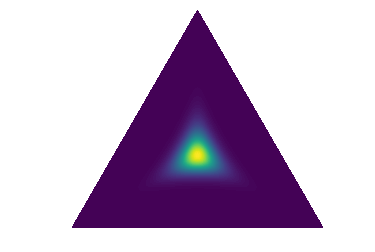

In [51]:
dist = GumbelSoftmax([1, 1, 1], 5)
draw_pdf_contours(dist, nlevels=100, subdiv=7)

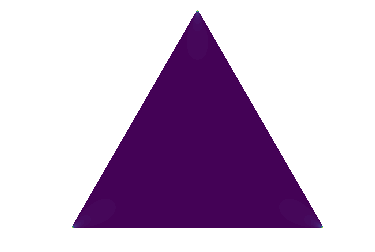

In [52]:
dist = GumbelSoftmax([1, 1, 1], 0.995)
draw_pdf_contours(dist, nlevels=100, subdiv=7)

## 3. Посмотрим зависимость от температуры для равновероятных классах

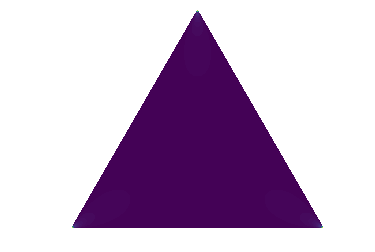

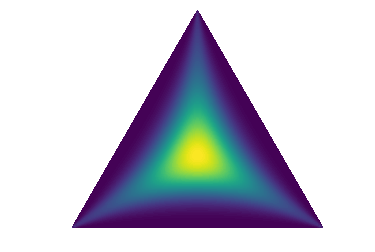

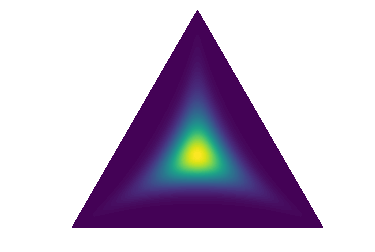

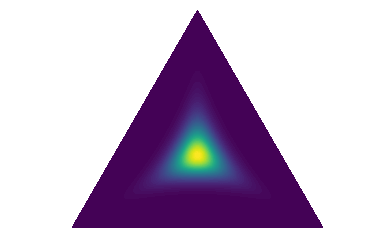

In [60]:
for tau in range(1,5,1):
    dist = GumbelSoftmax([1, 1, 1], tau)
    draw_pdf_contours(dist, nlevels=100, subdiv=7)

## 4. Рассмотрим неодинаковые вероятности

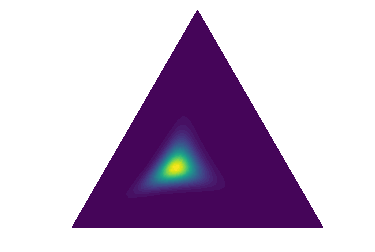

In [61]:
dist = GumbelSoftmax([1, 0.1, 0.1], 5)
draw_pdf_contours(dist, nlevels=50, subdiv=6)